# Data Science Project Notebook

In [0]:
# Data wrangling libraries.
import pandas as pd
import numpy as np

In [0]:
# Other libraries
import math

In [0]:
# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette(sns.cubehelix_palette(8, start=2))
from mpl_toolkits import mplot3d
from matplotlib.pyplot import cm

In [151]:
url_income = 'https://raw.githubusercontent.com/urehani1/491/master/Maryland_Median_Household_Income_By_Year_With_Margin_Of_Error__2007-2016.csv'
df_income = pd.read_csv(url_income)
print('File loaded')
display(df_income.head())

File loaded


,Date created,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
0,2018-08-02T00:00:00.000,2014,824,2380,2647,1798,2261,6251,2996,3125,...,4924,2223,1447,5287,2958,3891,4308,2953,2234,3253
1,2018-08-02T00:00:00.000,2010,833,2826,2311,1414,2006,5064,2965,3703,...,4582,2710,1609,5181,2747,5070,3948,3327,3097,3507
2,2018-08-02T00:00:00.000,2013,693,2773,2352,1071,1944,5241,3787,3280,...,3753,1836,1380,4946,3399,5169,5176,2999,3167,3420
3,2018-08-02T00:00:00.000,2011,760,2693,3430,1536,1728,4369,4213,3709,...,4603,2758,1911,6363,3426,2717,4929,2928,3582,4653
4,2018-08-02T00:00:00.000,2007,695,2604,1651,871,1042,5845,4311,4540,...,3934,2066,2240,3760,3244,4573,3963,3313,2961,4322


In [152]:
df_income=df_income.drop(columns=['Date created'])
df_income = df_income.drop(df_income[df_income.MARYLAND < 1000].index)
df_income.head(15)

,Year,MARYLAND,Allegany County,Anne Arundel County,Baltimore City,Baltimore County,Calvert County,Caroline County,Carroll County,Cecil County,...,Kent County,Montgomery County,Prince George's County,Queen Anne's County,Somerset County,St. Mary's County,Talbot County,Washington County,Wicomico County,Worcester County
6,2013,72482,39994,85685,41988,64624,91993,46015,82073,64880,...,55695,97873,71682,80143,36106,78274,57525,55643,47536,52276
7,2008,70482,39055,82616,40087,63078,82033,54934,78348,66131,...,52934,93895,71696,77686,39426,77703,62206,51587,48614,50347
11,2012,71169,38670,87083,39077,62413,87215,48772,79304,62443,...,49969,94365,69258,79012,34454,85478,61529,52604,50204,55875
12,2015,75784,39859,90825,43192,68317,98937,51294,84506,68972,...,52274,98314,76366,83914,38692,83148,62018,55270,52153,53366
13,2010,68933,37083,80908,38186,62300,86536,55480,80291,61506,...,49017,88559,69524,78503,38134,81559,56806,51610,47702,55492
14,2016,78787,44708,95297,46604,72305,97188,49616,89529,70504,...,54210,99604,78680,79966,38546,80049,62264,54643,50015,53509
15,2007,67989,37171,80158,36894,60828,89159,48387,79803,62489,...,46693,91440,67706,75902,35553,72534,56512,50257,49981,49067
16,2011,70075,38504,82980,38478,62309,88406,50809,82553,61191,...,49795,92288,70114,75158,35426,80943,55145,52028,45788,48472
17,2009,69193,37151,79843,38458,64629,86281,49050,78418,60543,...,50585,93774,69545,75146,35621,71316,59633,48883,46404,47829
18,2014,73851,39808,86654,41895,67766,92446,49573,84500,62198,...,53288,97279,71904,80650,38376,84686,54836,54606,51927,55691


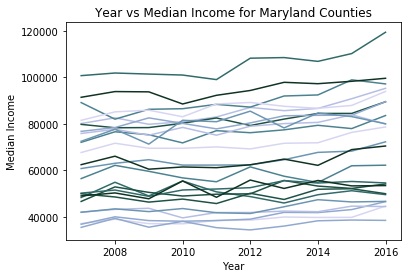

In [153]:
#counties = []
counties = list(df_income)
counties = counties[2:]
#print(counties)
color=iter(cm.rainbow(np.linspace(0,1,1)))
c=next(color)
for x in counties:
    x, y = zip(*sorted(zip(df_income['Year'], df_income[x])))
    plt.plot(x,y,label = 'dd')
plt.title('Year vs Median Income for Maryland Counties')
plt.xlabel('Year')
plt.ylabel('Median Income')
#plt.plot(x,y)
plt.show()

In [154]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = df_income[['Year']]
df_pred_income = pd.DataFrame(columns=['County', 'Income_2017', 'Income_2018', 'Income_2019'])
for i in list(df_income.columns)[2:]:
  #print(type(i))
  y = df_income[[i]]
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)

  regression_model = LinearRegression()
  regression_model.fit(x_train, y_train)
  income = regression_model.predict([[2017]])
  income2 = regression_model.predict([[2018]])
  income3 = regression_model.predict([[2019]])
  #print(i,income[0][0],income2[0][0],income3[0][0])
  df_pred_income = df_pred_income.append({
      'County': i,
      'Income_2017': int(income[0][0]),
      'Income_2018': int(income2[0][0]),
      'Income_2019': int(income3[0][0])
  }, ignore_index=True)
  
# url_newincome = 'https://raw.githubusercontent.com/urehani1/491/master/maryland_income19.csv'
# df_newincome = pd.read_csv(url_newincome)
# df_newincome.head(15)
df_pred_income.head()

,County,Income_2017,Income_2018,Income_2019
0,Allegany County,42977,43596,44216
1,Anne Arundel County,94512,96174,97835
2,Baltimore City,45677,46519,47361
3,Baltimore County,70712,71679,72646
4,Calvert County,100630,102595,104560


In [0]:
df_nces = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/ncesdata_md.csv')

In [0]:
df_fafsa = pd.read_csv('https://media.githubusercontent.com/media/RobRoseKnows/umbc-cs-projects/master/umbc-cs491-data-science/proj/data/csv/MD.csv')

In [157]:
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,Aberdeen High,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,Academy for College and Career Exploration,Baltimore City Public Schools,Baltimore city,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,Academy of Health Sciences at PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,Achievement Academy @ Harbor City High,Baltimore City Public Schools,Baltimore city,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,Albert Einstein High,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [158]:
df_fafsa.head()

,Name,City,State,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
0,ABERDEEN HIGH,ABERDEEN,MD,169,160,139,131,175,162,206,192
1,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,BALTIMORE,MD,49,42,45,42,47,46,53,50
2,ACADEMY OF HEALTH SCIENCES AT PGCC,LARGO,MD,82,79,78,77,78,78,82,80
3,ACADEMY OF THE HOLY CROSS,KENSINGTON,MD,91,91,80,77,83,81,84,82
4,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,BALTIMORE,MD,36,22,34,18,37,22,48,31


In [159]:
# Convert all the school names to uppercase.
df_nces['School Name'] = df_nces['School Name'].apply(lambda x: x.upper())
# Convert Baltimore city to Baltimore City so it will merge properly.
df_nces['County Name*'] = df_nces['County Name*'].replace({'Baltimore city': 'Baltimore City'})
df_nces.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Locale*,Charter,Magnet*,Title I School*,Title 1 School Wide*,Students*,Teachers*,Student Teacher Ratio*,Free Lunch*,Reduced Lunch*
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,Suburb: Midsize,No,Yes,Yes,Yes,1485,92.33,16.1,–,–
1,240009001381,MD-30-300427,2400090,MD-30,6,12,ACADEMY FOR COLLEGE AND CAREER EXPLORATION,Baltimore City Public Schools,Baltimore City,2801 Saint Lo Drive,...,City: Large,No,No,Yes,Yes,587,35.5,16.5,–,–
2,240051001704,MD-16-161350,2400510,MD-16,9,12,ACADEMY OF HEALTH SCIENCES AT PGCC,Prince George's County Public Schools,Prince George's County,301 Largo Rd,...,Suburb: Large,No,Yes,No,†,431,15,28.7,–,–
3,240009000236,MD-30-300413,2400090,MD-30,9,12,ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH,Baltimore City Public Schools,Baltimore City,2201 Pinewood Avenue,...,City: Large,No,No,Yes,Yes,379,18,21.1,–,–
4,240048000773,MD-15-150789,2400480,MD-15,9,12,ALBERT EINSTEIN HIGH,Montgomery County Public Schools,Montgomery County,11135 Newport Mill Rd,...,Suburb: Large,No,No,Yes,Yes,1748,114.61,15.3,–,–


In [160]:
df_joined = df_nces.merge(df_fafsa, left_on="School Name", right_on="Name")
df_joined = df_joined.merge(df_pred_income, left_on="County Name*", right_on="County")
df_joined.head()

,NCES School ID,State School ID,NCES District ID,State District ID,Low Grade*,High Grade*,School Name,District,County Name*,Street Address,...,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018,County,Income_2017,Income_2018,Income_2019
0,240039000679,MD-12-120270,2400390,MD-12,9,12,ABERDEEN HIGH,Harford County Public Schools,Harford County,251 Paradise Rd,...,139,131,175,162,206,192,Harford County,81495,82190,82885
1,240039000683,MD-12-120373,2400390,MD-12,9,12,BEL AIR HIGH,Harford County Public Schools,Harford County,100 Heighe St,...,202,195,220,214,252,245,Harford County,81495,82190,82885
2,240039001380,MD-12-120385,2400390,MD-12,9,12,C. MILTON WRIGHT HIGH,Harford County Public Schools,Harford County,1301 N Fountain Green Rd,...,223,211,241,231,257,249,Harford County,81495,82190,82885
3,240039000480,MD-12-120292,2400390,MD-12,7,12,CENTER FOR EDUCATIONAL OPPORTUNITY,Harford County Public Schools,Harford County,253 Paradise Rd,...,5,<5,5,<5,5,5,Harford County,81495,82190,82885
4,240039000690,MD-12-120176,2400390,MD-12,9,12,EDGEWOOD HIGH,Harford County Public Schools,Harford County,2415 Willoughby Beach Rd,...,153,129,166,136,194,166,Harford County,81495,82190,82885


In [161]:
df_joined.columns.tolist()

['NCES School ID',
 'State School ID',
 'NCES District ID',
 'State District ID',
 'Low Grade*',
 'High Grade*',
 'School Name',
 'District',
 'County Name*',
 'Street Address',
 'City_x',
 'State_x',
 'ZIP',
 'ZIP 4-digit',
 'Phone',
 'Locale Code*',
 'Locale*',
 'Charter',
 'Magnet*',
 'Title I School*',
 'Title 1 School Wide*',
 'Students*',
 'Teachers*',
 'Student Teacher Ratio*',
 'Free Lunch*',
 'Reduced Lunch*',
 'Name',
 'City_y',
 'State_y',
 'Applications_1920_Submitted_Apr19_2019',
 'Applications_1920_Complete_Apr19_2019',
 'Applications_1819_Submitted_Apr19_2018',
 'Applications_1819_Complete_Apr19_2018',
 'Applications_1819_Submitted_Jun_2018',
 'Applications_1819_Complete_Jun_2018',
 'Applications_1819_Submitted_Dec_2018',
 'Applications_1819_Complete_Dec_2018',
 'County',
 'Income_2017',
 'Income_2018',
 'Income_2019']

In [0]:
# Get rid of any <5 values in Applications by replacing it with 0.
df_joined['Applications_1920_Submitted_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Submitted_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1920_Complete_Apr19_2019'] = pd.to_numeric(df_joined['Applications_1920_Complete_Apr19_2019'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Apr19_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Apr19_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Jun_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Jun_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Submitted_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Submitted_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Applications_1819_Complete_Dec_2018'] = pd.to_numeric(df_joined['Applications_1819_Complete_Dec_2018'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)

In [0]:
df_joined['Students'] = pd.to_numeric(df_joined['Students*'].astype(str).str.replace(',',''), errors='coerce').fillna(0).astype(int)
df_joined['Teachers'] = pd.to_numeric(df_joined['Teachers*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)
df_joined['Student_Teacher_Ratio'] = pd.to_numeric(df_joined['Student Teacher Ratio*'].astype(str).str.replace(',',''), errors='coerce').fillna(0)


In [0]:
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Applications_1920_Submitted_Apr19_2019']
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Applications_1819_Submitted_Apr19_2018']
df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'] = df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'] = df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Complete_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Complete_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Apr19_2019'] / df_joined['Students']
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Apr19_2018'] / df_joined['Students']
df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'] = df_joined['Applications_1920_Submitted_Students_Perc_Apr19_2019'].fillna(0)
df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'] = df_joined['Applications_1819_Submitted_Students_Perc_Apr19_2018'].fillna(0)

In [0]:
df_joined['City'] = df_joined['City_x']
df_joined['State'] = df_joined['State_x']
df_joined.drop('County Name*', axis=1, inplace=True)
df_joined.drop('City_x', axis=1, inplace=True)
df_joined.drop('City_y', axis=1, inplace=True)
df_joined.drop('State_x', axis=1, inplace=True)
df_joined.drop('State_y', axis=1, inplace=True)
df_joined.drop('Name', axis=1, inplace=True)
df_joined.drop('Students*', axis=1, inplace=True)
df_joined.drop('Teachers*', axis=1, inplace=True)
df_joined.drop('Student Teacher Ratio*', axis=1, inplace=True)

In [0]:
df_joined.rename(columns={
    'Low Grade*': 'Low_Grade',
    'High Grade*': 'High_Grade',
    'Locale Code*': 'Locale_Code',
    'Locale*': 'Locale',
    'Magnet*': 'Magnet',
    'Title I School*': 'Title_I_School',
    'Title 1 School Wide*': 'Title_1_School_Wide',
    'Free Lunch*': 'Free_Lunch',
    'Reduced Lunch*': 'Reduced_Lunch'
}, inplace=True)

## Checking Values

We want to check the possible unique values of all the categorical variables so we can get a better idea of the data structure.

First up is Free Lunch and Reduced Lunch, according to the data download, `–` means that data was missing and `†` means that data didn't meet the quality standards. If all we have in a column is missing data and zeros, we likely are not going to get any meaningful information from that column.

In [169]:
print(df_joined['Free_Lunch'].unique())
print(df_joined['Reduced_Lunch'].unique())
print(df_joined['State'].unique())

['–' '0']
['–' '0']
['MD']


In [0]:
# Since all that's in the Free_Lunch and Reduced_Lunch columns is '-' and 0, we'll just drop them.
df_joined.drop('Free_Lunch', axis=1, inplace=True)
df_joined.drop('Reduced_Lunch', axis=1, inplace=True)
df_joined.drop('State', axis=1, inplace=True)

In [172]:
print(df_joined['City'].unique())
print(df_joined['County'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Charter'].unique())
print(df_joined['Locale'].unique())
print(df_joined['Locale_Code'].unique())
print(df_joined['Title_I_School'].unique())
print(df_joined['Title_1_School_Wide'].unique())

['Aberdeen' 'Bel Air' 'Edgewood' 'Fallston' 'Havre de Grace' 'Joppa'
 'Pylesville' 'Baltimore' 'Largo' 'Bladensburg' 'Bowie' 'Capitol Heights'
 'Springdale' 'Laurel' 'Cheltenham' 'Temple Hills' 'Upper Marlboro'
 'Lanham' 'Greenbelt' 'Landover' 'Fort Washington' 'Brandywine'
 'Beltsville' 'Hyattsville' 'Oxon Hill' 'Riverdale' 'Forestville'
 'Clinton' 'Kensington' 'Bethesda' 'Clarksburg' 'Rockville' 'Damascus'
 'Gaithersburg' 'Silver Spring' 'Germantown' 'Burtonsville' 'Poolesville'
 'Sandy Spring' 'Potomac' 'Cumberland' 'Cresaptown' 'Frostburg'
 'Annapolis' 'Gambrills' 'Pasadena' 'Hanover' 'Glen Burnie' 'Ft Meade'
 'Millersville' 'Severna Park' 'Edgewater' 'Harwood' 'Columbia'
 'Ellicott City' 'Glenelg' 'Marriottsville' 'Fulton' 'Clarksville'
 'Hagerstown' 'Boonsboro' 'Clear Spring' 'Hancock' 'Smithsburg'
 'Williamsport' 'Chesapeake City' 'Elkton' 'North East' 'Perryville'
 'Brunswick' 'Thurmont' 'Frederick' 'Middletown' 'Ijamsville'
 'Walkersville' 'Prince Frederick' 'Huntingtown' 'Owi

## Graphs of Predictor Variables

Lets do some neat count graphs to see the spread of certain categories!

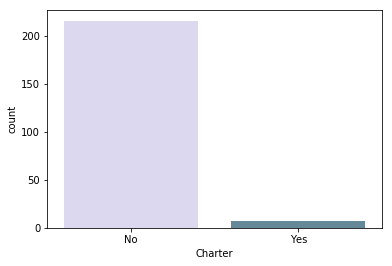

In [173]:
ax_charter = sns.countplot(x='Charter', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

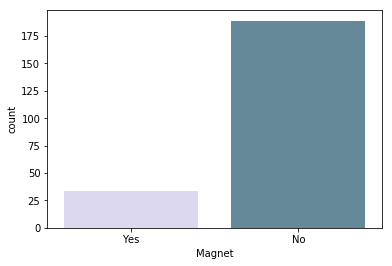

In [174]:
ax_magnet = sns.countplot(x='Magnet', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

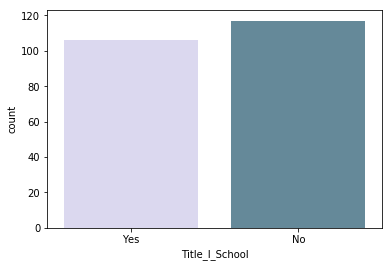

In [175]:
ax_title_I_school = sns.countplot(x='Title_I_School', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

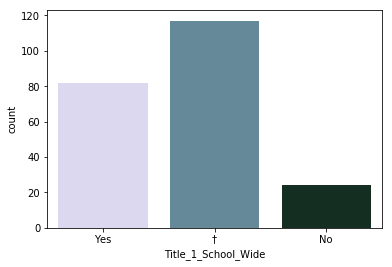

In [176]:
ax_title_1_school_wide = sns.countplot(x='Title_1_School_Wide', data=df_joined, palette=sns.cubehelix_palette(3, start=2))

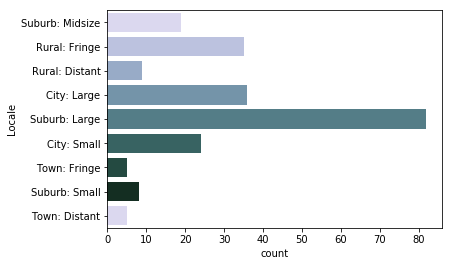

In [177]:
ax_locale = sns.countplot(y='Locale', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

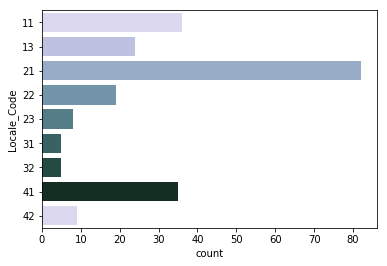

In [180]:
ax_locale_code = sns.countplot(y='Locale_Code', data=df_joined, palette=sns.cubehelix_palette(8, start=2))

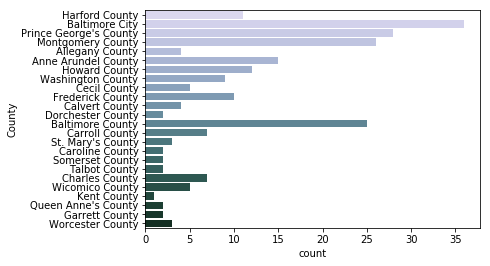

In [182]:
ax_county = sns.countplot(y='County', data=df_joined, palette=sns.cubehelix_palette(24, start=2))

## Checking Correlation for Similar Columns



In [0]:
df_joined['Locale_Code_Coded'] = df_joined['Locale_Code'].astype('category').cat.codes
df_joined['Locale_Coded'] = df_joined['Locale'].astype('category').cat.codes

In [184]:
# Checking the correlation between Locale category and Locale Code
print(df_joined.corr()['Locale_Coded']['Locale_Code_Coded'])

0.39675464201624266


In [0]:
df_joined.drop('Locale_Coded', axis=1, inplace=True)
df_joined.drop('Locale_Code_Coded', axis=1, inplace=True)

Looks like `Locale_Code` isn't just a duplicate of `Locale`, so they both get to stay in! For the actual analysis though, I'll have to one hot encode them.

Lets do that now (one-hot encode all the categorical variables)! I do plan on label encoding "Yes" to 1 and "No" to 0 for the ones that are only Yes and No, and don't have any missing data.

## Encoding Categories

This is important because typically categories aren't able to be processed rawly by most algorithms and techniques, so we need to convert them to a numerical value.

### Label Encoding

First lets encode the Yes and No categories as int8, which can be properly processed by machine learning algorithms.

In [186]:
df_joined['Charter'] = df_joined['Charter'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Magnet'] = df_joined['Magnet'].map({'Yes': 1, 'No': 0}).astype('int8')
df_joined['Title_I_School'] = df_joined['Title_I_School'].map({'Yes': 1, 'No': 0}).astype('int8')
print(df_joined['Charter'].unique())
print(df_joined['Magnet'].unique())
print(df_joined['Title_I_School'].unique())

[0 1]
[1 0]
[1 0]


Nice! That worked out nicely. Now lets move on to the other categories.


### One-Hot Encoding

One-hot encoding converts each category to a 1 or 0 in its own column. Very useful for machine learning and data science techniques as it converts categories without possibly losing information like you can in label encoding with n > 2.

In [0]:
df_joined['Locale_Code'] = df_joined['Locale_Code'].astype('category')
df_joined['ZIP'] = df_joined['ZIP'].astype('category')
df_joined['City'] = df_joined['City'].astype('category')
df_joined['District'] = df_joined['District'].astype('category')
df_joined['County'] = df_joined['County'].astype('category')
df_joined = df_joined.join(pd.get_dummies(df_joined[['Title_1_School_Wide', 'Locale', 'Locale_Code', 'ZIP', 'City', 'District', 'County']]))

In [188]:

print(df_joined.columns.tolist())

['NCES School ID',
 'State School ID',
 'NCES District ID',
 'State District ID',
 'Low_Grade',
 'High_Grade',
 'School Name',
 'District',
 'Street Address',
 'ZIP',
 'ZIP 4-digit',
 'Phone',
 'Locale_Code',
 'Locale',
 'Charter',
 'Magnet',
 'Title_I_School',
 'Title_1_School_Wide',
 'Applications_1920_Submitted_Apr19_2019',
 'Applications_1920_Complete_Apr19_2019',
 'Applications_1819_Submitted_Apr19_2018',
 'Applications_1819_Complete_Apr19_2018',
 'Applications_1819_Submitted_Jun_2018',
 'Applications_1819_Complete_Jun_2018',
 'Applications_1819_Submitted_Dec_2018',
 'Applications_1819_Complete_Dec_2018',
 'County',
 'Income_2017',
 'Income_2018',
 'Income_2019',
 'Students',
 'Teachers',
 'Student_Teacher_Ratio',
 'Applications_1920_Completed_Submitted_Perc_Apr19_2019',
 'Applications_1819_Completed_Submitted_Perc_Apr19_2018',
 'Applications_1920_Complete_Students_Perc_Apr19_2019',
 'Applications_1819_Complete_Students_Perc_Apr19_2018',
 'Applications_1920_Submitted_Students_Perc

That's a lot of columns, but we need to delete all the columns we're not going to use in our analysis like the school ids and school codes.

In [0]:
# Drop all the ones we one-hot encoded
df_joined.drop('Title_1_School_Wide', axis=1, inplace=True)
df_joined.drop('Locale', axis=1, inplace=True)
df_joined.drop('Locale_Code', axis=1, inplace=True)
df_joined.drop('ZIP', axis=1, inplace=True)
df_joined.drop('City', axis=1, inplace=True)
df_joined.drop('District', axis=1, inplace=True)
df_joined.drop('County', axis=1, inplace=True)

In [0]:
# Drop all the unneccessary columns.
df_joined.drop('Phone', axis=1, inplace=True)
df_joined.drop('ZIP 4-digit', axis=1, inplace=True)
df_joined.drop('Street Address', axis=1, inplace=True)
df_joined.drop('School Name', axis=1, inplace=True)
df_joined.drop('NCES School ID', axis=1, inplace=True)
df_joined.drop('State School ID', axis=1, inplace=True)
df_joined.drop('NCES District ID', axis=1, inplace=True)
df_joined.drop('State District ID', axis=1, inplace=True)

In [0]:
df_joined['High_Grade'] = df_joined['High_Grade'].astype('int8')
df_joined['Low_Grade'] = df_joined['Low_Grade'].astype('int8')

In [0]:
def pretty_density_plot(titles, texta=(1, "right")):
    sns.set(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})
    
    df_temp = df_joined[titles]

    df_temp = pd.melt(df_temp, id_vars=[], var_name='Year', value_name="Students")
    
    # Initialize the FacetGrid object
    pal = sns.cubehelix_palette(len(titles), start=2)
    g = sns.FacetGrid(df_temp, row="Year", hue="Year", aspect=15, height=1, palette=pal)

    # Draw the densities in a few steps
    g.map(sns.kdeplot, "Students", clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
    g.map(sns.kdeplot, "Students", clip_on=False, color="w", lw=2, bw=.2)
    g.map(plt.axhline, y=0, lw=2, clip_on=False)


    # Define and use a simple function to label the plot in axes coordinates
    def label(x, color, label):
        ax = plt.gca()
        ax.text(texta[0], .2, label.replace('_', ' '), fontweight="bold", color=color,
            ha=texta[1], va="center", transform=ax.transAxes)
    
    g.map(label, "Students")

    # Set the subplots to overlap
    g.fig.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[])
    g.despine(bottom=True, left=True)

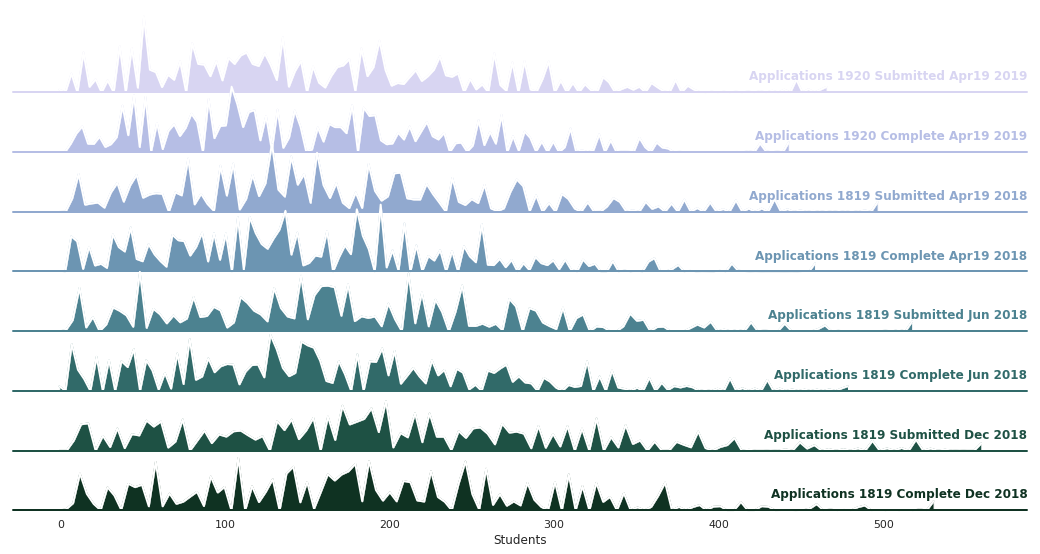

In [219]:
raw_cols = ['Applications_1920_Submitted_Apr19_2019',
            'Applications_1920_Complete_Apr19_2019',
            'Applications_1819_Submitted_Apr19_2018',
            'Applications_1819_Complete_Apr19_2018',
            'Applications_1819_Submitted_Jun_2018',
            'Applications_1819_Complete_Jun_2018',
            'Applications_1819_Submitted_Dec_2018',
            'Applications_1819_Complete_Dec_2018']
pretty_density_plot(raw_cols, (1, "right"))

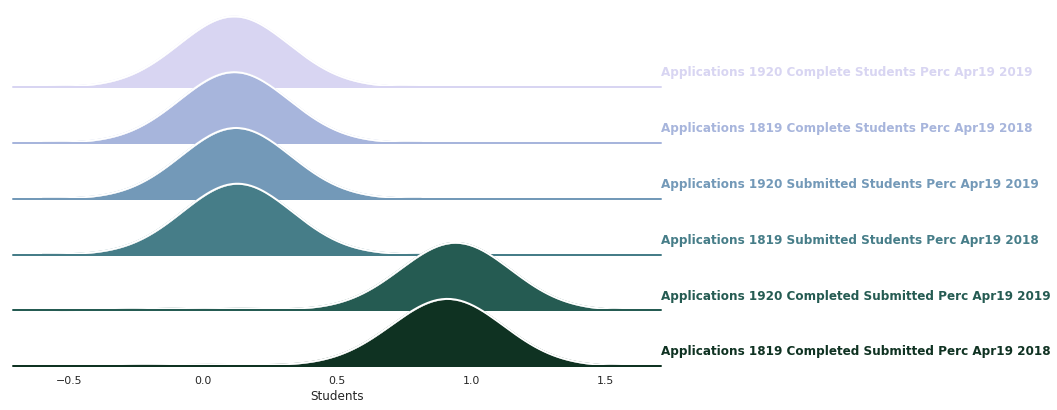

In [250]:
perc_cols =  ['Applications_1920_Complete_Students_Perc_Apr19_2019',
              'Applications_1819_Complete_Students_Perc_Apr19_2018',
              'Applications_1920_Submitted_Students_Perc_Apr19_2019',
              'Applications_1819_Submitted_Students_Perc_Apr19_2018',
             'Applications_1920_Completed_Submitted_Perc_Apr19_2019',
              'Applications_1819_Completed_Submitted_Perc_Apr19_2018']
pretty_density_plot(perc_cols, (1, "left"))

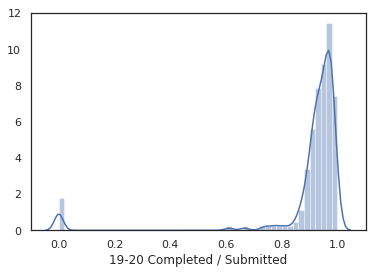

In [240]:
ax_completed_2019 = sns.distplot(df_joined['Applications_1920_Completed_Submitted_Perc_Apr19_2019'], axlabel="19-20 Completed / Submitted")

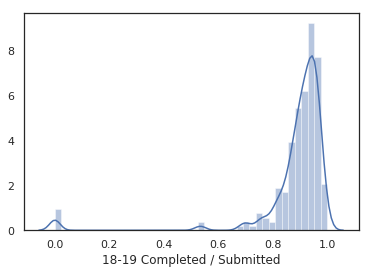

In [239]:
ax_completed_2018 = sns.distplot(df_joined['Applications_1819_Completed_Submitted_Perc_Apr19_2018'], axlabel="18-19 Completed / Submitted")

## Data Descriptions

Lets get some basic statisics about the data so we can put that in our analysis.

In [246]:
df_joined[raw_cols].describe()

,Applications_1920_Submitted_Apr19_2019,Applications_1920_Complete_Apr19_2019,Applications_1819_Submitted_Apr19_2018,Applications_1819_Complete_Apr19_2018,Applications_1819_Submitted_Jun_2018,Applications_1819_Complete_Jun_2018,Applications_1819_Submitted_Dec_2018,Applications_1819_Complete_Dec_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,149.757848,142.237668,155.775785,143.076233,167.188341,153.856502,188.004484,175.390135
std,94.614222,91.516267,95.612270,90.243557,100.601481,94.887591,110.647785,104.801981
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,80.500000,73.500000,83.500000,75.500000,92.000000,80.500000,105.500000,95.500000
50%,134.000000,126.000000,143.000000,133.000000,160.000000,147.000000,184.000000,172.000000
75%,214.000000,200.500000,212.000000,195.500000,229.000000,213.500000,258.000000,244.500000
max,465.000000,442.000000,496.000000,458.000000,517.000000,478.000000,559.000000,530.000000


In [251]:
df_joined[perc_cols].describe()

,Applications_1920_Complete_Students_Perc_Apr19_2019,Applications_1819_Complete_Students_Perc_Apr19_2018,Applications_1920_Submitted_Students_Perc_Apr19_2019,Applications_1819_Submitted_Students_Perc_Apr19_2018,Applications_1920_Completed_Submitted_Perc_Apr19_2019,Applications_1819_Completed_Submitted_Perc_Apr19_2018
count,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,0.114366,0.115254,0.121558,0.126914,0.904644,0.885486
std,0.042031,0.040626,0.040843,0.039848,0.182357,0.150688
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.091021,0.091294,0.098464,0.102305,0.915466,0.877690
50%,0.116360,0.118255,0.124521,0.129955,0.946809,0.920635
75%,0.142247,0.141744,0.147608,0.151178,0.973534,0.950857
max,0.209890,0.216355,0.213187,0.232453,1.000000,1.000000


In [257]:
predictor_cols = df_joined.columns.difference(perc_cols+raw_cols)
print(predictor_cols)

Index(['Charter', 'City_Aberdeen', 'City_Accident', 'City_Annapolis',
       'City_Baltimore', 'City_Bel Air', 'City_Beltsville', 'City_Berlin',
       'City_Bethesda', 'City_Bladensburg',
       ...
       'ZIP_21811', 'ZIP_21817', 'ZIP_21837', 'ZIP_21851', 'ZIP_21853',
       'ZIP_21863', 'ZIP_21901', 'ZIP_21903', 'ZIP_21915', 'ZIP_21921'],
      dtype='object', length=357)
